clustering unsupervised with supervised data

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette score: 0.10336175189783602
Calinski Harabasz score: 371.1552929104443
Davies Bouldin score: 2.697793366063484


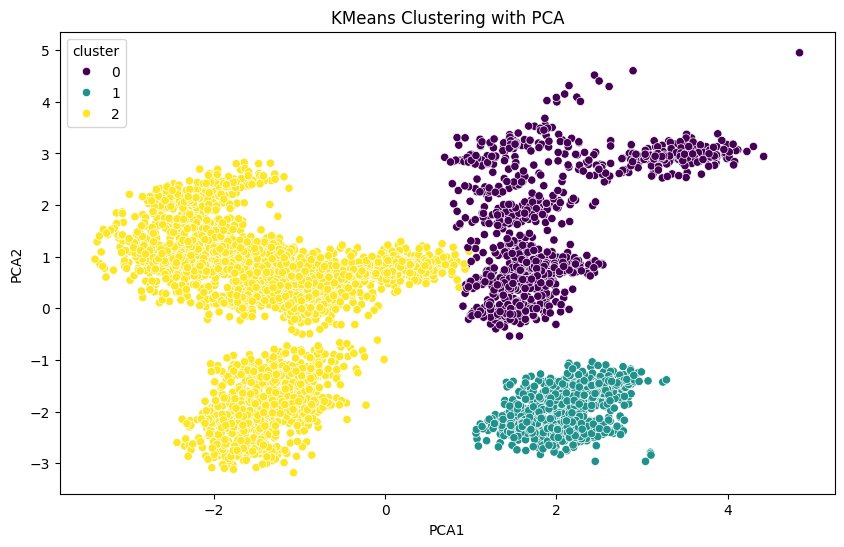

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('/teamspace/studios/this_studio/data/csv-clean/processed_combined_data_final_3.csv')

# Drop unnecessary columns
#columns_to_drop = ['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1']  # Add any other columns that are not needed
#data = data.drop(columns=columns_to_drop, errors='ignore')

# Ensure all columns are numerical
# If there are categorical variables, encode them
# Example: data['category_col'] = data['category_col'].astype('category').cat.codes

# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(data)

# Fit the KMeans model
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
data['cluster'] = kmeans.labels_

# Calculate evaluation metrics
silhouette = silhouette_score(X, kmeans.labels_)
calinski_harabasz = calinski_harabasz_score(X, kmeans.labels_)
davies_bouldin = davies_bouldin_score(X, kmeans.labels_)

print(f'Silhouette score: {silhouette}')
print(f'Calinski Harabasz score: {calinski_harabasz}')
print(f'Davies Bouldin score: {davies_bouldin}')

# Apply PCA for dimensionality reduction for visualization
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Create a DataFrame with PCA results
pca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
pca_df['cluster'] = data['cluster']

# Plot the PCA results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='cluster', data=pca_df, palette='viridis')
plt.title('KMeans Clustering with PCA')
plt.show()


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Consensus Silhouette score: 0.057696434318091495
Consensus Calinski Harabasz score: 253.19302676353118
Consensus Davies Bouldin score: 3.3359248272922137


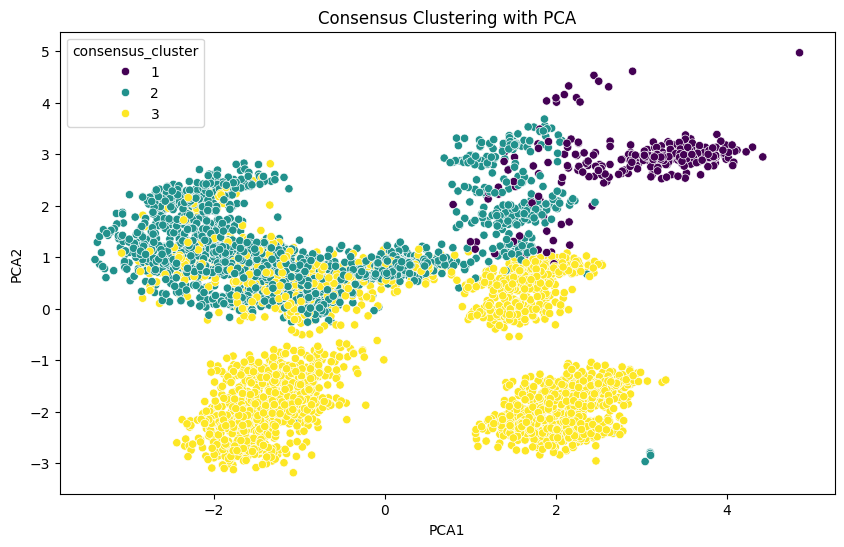

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, fcluster


# Load the dataset
data = pd.read_csv('/teamspace/studios/this_studio/data/csv-clean/processed_combined_data_final_3.csv')

# Drop unnecessary columns
#columns_to_drop = ['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1']  # Add any other columns that are not needed
#data = data.drop(columns=columns_to_drop, errors='ignore')

# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(data)

# Initialize clustering algorithms with different parameters
clustering_algorithms = {
    'KMeans_3': KMeans(n_clusters=3, random_state=42),
    'KMeans_4': KMeans(n_clusters=4, random_state=42),
    'DBSCAN_03_10': DBSCAN(eps=0.3, min_samples=10),
    'DBSCAN_05_5': DBSCAN(eps=0.5, min_samples=5),
    'Agglomerative_3': AgglomerativeClustering(n_clusters=3),
    'Agglomerative_4': AgglomerativeClustering(n_clusters=4)
}

# Store the clustering results
cluster_results = {}

for name, algorithm in clustering_algorithms.items():
    algorithm.fit(X)
    cluster_results[name] = algorithm.labels_

# Combine the clustering results into a DataFrame
cluster_df = pd.DataFrame(cluster_results)


# Calculate the co-association matrix
co_association_matrix = np.zeros((X.shape[0], X.shape[0]))

for cluster_labels in cluster_results.values():
    for i in range(len(cluster_labels)):
        for j in range(len(cluster_labels)):
            if cluster_labels[i] == cluster_labels[j]:
                co_association_matrix[i, j] += 1

# Normalize the co-association matrix
co_association_matrix /= len(cluster_results)

# Perform hierarchical clustering on the co-association matrix
distance_matrix = 1 - co_association_matrix
linkage_matrix = linkage(squareform(distance_matrix), method='average')

# Determine the final cluster labels
final_labels = fcluster(linkage_matrix, t=3, criterion='maxclust')
data['consensus_cluster'] = final_labels

# Evaluate the consensus clustering
silhouette = silhouette_score(X, final_labels)
calinski_harabasz = calinski_harabasz_score(X, final_labels)
davies_bouldin = davies_bouldin_score(X, final_labels)

print(f'Consensus Silhouette score: {silhouette}')
print(f'Consensus Calinski Harabasz score: {calinski_harabasz}')
print(f'Consensus Davies Bouldin score: {davies_bouldin}')

# Plot the final consensus clusters using PCA for visualization
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

pca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
pca_df['consensus_cluster'] = data['consensus_cluster']

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='consensus_cluster', data=pca_df, palette='viridis')
plt.title('Consensus Clustering with PCA')
plt.show()

